# 1. Import Lib

In [1]:
import networkx as nx
import numpy as np
from sthype import SpatialGraph, SpatialTemporalGraph
from sthype.graph_functions import spatial_temporal_graph_from_spatial_graphs
from sthype.plot import plot_spatial_temporal_graph, plot_spatial_temporal_graph_node, plot_spatial_graph, plot_spatial_temporal_graph_hyperedge
import matplotlib.pyplot as plt
import os
import pickle
import pandas as pd
from shapely import LineString

%load_ext autoreload
%autoreload 2

# 2. Import SpatialGraph

In [2]:
max_timesteps = 38
directory = "/home/ipausers/hamzaoui/Documents/Data/Prince/393_20231129_Plate06"

timesteps = []
for file in os.listdir(directory):
    timesteps.append(file)
timesteps.sort()

spatial_graphs = []
for timestep in timesteps[:max_timesteps]:
    print('Processing timestep :', timestep)
    try:
        G, pos = pickle.load(open(f"{directory}/{timestep}/Analysis/nx_graph_pruned_width.p", 'rb'))
    except:
        print('No Width Found')
        G, pos = pickle.load(open(f"{directory}/{timestep}/Analysis/nx_graph_pruned.p", 'rb'))
    for u, v, edge_data in G.edges(data=True):
        edge_data['pixels'] = edge_data.pop('pixel_list')
    for u, node_data in G.nodes(data=True):
        node_data['position'] = pos[u]
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    Sg = SpatialGraph(G0)
    spatial_graphs.append(Sg)

spatial_graph = spatial_graphs[-1]
sg = spatial_graph
print('Amount of Spatial Graphs:', len(spatial_graphs))

Processing timestep : 20231129_2046_Plate06
Processing timestep : 20231129_2246_Plate06
No Width Found
Processing timestep : 20231130_0045_Plate06
Processing timestep : 20231130_0246_Plate06
No Width Found
Processing timestep : 20231130_0446_Plate06
No Width Found
Processing timestep : 20231130_0645_Plate06
Processing timestep : 20231130_0846_Plate06
Processing timestep : 20231130_1046_Plate06
No Width Found
Processing timestep : 20231130_1245_Plate06
Processing timestep : 20231130_1446_Plate06
Processing timestep : 20231130_1646_Plate06
Processing timestep : 20231130_1846_Plate06
Processing timestep : 20231130_2046_Plate06
Processing timestep : 20231130_2246_Plate06
Processing timestep : 20231201_0046_Plate06
Processing timestep : 20231201_0246_Plate06
Processing timestep : 20231201_0446_Plate06
Processing timestep : 20231201_0646_Plate06
Processing timestep : 20231201_0846_Plate06
Processing timestep : 20231201_1046_Plate06
Processing timestep : 20231201_1249_Plate06
Processing times

# 3. Create Stg

In [3]:
spatial_temporal_graph = spatial_temporal_graph_from_spatial_graphs(spatial_graphs, np.arange(len(spatial_graphs)), verbose=1)
stg = spatial_temporal_graph

Segmentation
Edge Activation
Comparing with graph 37
Comparing with graph 36
Comparing with graph 35
Comparing with graph 34
Comparing with graph 33
Comparing with graph 32
Comparing with graph 31
Comparing with graph 30
Comparing with graph 29
Comparing with graph 28
Comparing with graph 27
Comparing with graph 26
Comparing with graph 25
Comparing with graph 24
Comparing with graph 23
Comparing with graph 22
Comparing with graph 21
Comparing with graph 20
Comparing with graph 19
Comparing with graph 18
Comparing with graph 17
Comparing with graph 16
Comparing with graph 15
Comparing with graph 14
Comparing with graph 13
Comparing with graph 12
Comparing with graph 11
Comparing with graph 10
Comparing with graph 9
Comparing with graph 8
Comparing with graph 7
Comparing with graph 6
Comparing with graph 5
Comparing with graph 4
Comparing with graph 3
Comparing with graph 2
Comparing with graph 1
Comparing with graph 0


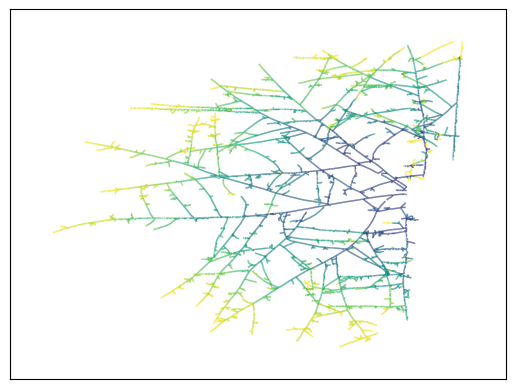

In [4]:
plot_spatial_temporal_graph(spatial_temporal_graph, color_group='activation')

# 4. Growth Speed Compared To Tip Radius

## Init

In [5]:
g_t = []
for i in range(max_timesteps):
    g_t.append(stg.get_graph_at(i))
widths_t = []

hyperedge_e = {}
for u, v, ed in g_t[-1].edges(data=True):
    hyperedge_e.setdefault(ed["hyperedge"], []).append((u, v, ed['activation'], 1.725*LineString(ed['pixels']).length))

In [6]:
i=0
tips = []
tips_light = []
growth_l = []
growth_s = []
growth_v = []
for edges in hyperedge_e.values():
    length = np.sum([l for u,v,a,l in edges])
    if length < 2000:
        i+=1
        continue
    for i in range(1, max_timesteps-1):
        widths = [g_t[i+1][u][v]['attributes'].get('width', [np.nan]) for u, v, a, l in edges if a==i]
        widths = [w for ws in widths for w in ws]
        width = 1.725*np.median(widths)
        if np.isnan(width) or width<=1.5:
            continue
        lengths = [l for u, v, a, l in edges if a==i+1]
        ss = [1.725*np.pi*l*np.median(g_t[a][u][v]['attributes'].get('width', np.nan)) for u, v, a, l in edges if a==i+1]
        vs = [1.725*1.725*np.pi*l*np.median(g_t[a][u][v]['attributes'].get('width', np.nan))*np.median(g_t[a][u][v]['attributes'].get('width', np.nan))/4 for u, v, a, l in edges if a==i+1]
        length = np.sum(lengths)
        if length==0 or length>1000:
            continue
        tips.append(width)
        growth_l.append(length)
        if np.isnan(ss).any():
            continue
        tips_light.append(width)
        s = np.sum(ss)
        v = np.sum(vs)
        growth_s.append(s)
        growth_v.append(v)

radius = np.array(tips)/2
radius_light = np.array(tips_light)/2
growth_l = np.array(growth_l)/2
growth_s = np.array(growth_s)/2
growth_v = np.array(growth_v)/2
print("ignored edges :", i)

/home/ipausers/hamzaoui/.conda/envs/STHypeEnv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ipausers/hamzaoui/.conda/envs/STHypeEnv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ignored edges : 42


## To Df

In [7]:
df = pd.DataFrame()
df['radius (um)'] = radius
df['length_growth_speed (um/h)'] = growth_l

df2 = pd.DataFrame()
df2['radius (um)'] = radius_light
df2['surface_growth_speed (um²/h) (2pi*r*l)'] = growth_s
df2['volume_growth_speed (um³/h) (pi*r²*l)'] = growth_v

In [8]:
df.to_csv('/home/ipausers/hamzaoui/Documents/Data/Plot/Growth speed vs tip/20231129_Plate06_length_growth_speed.csv')
df2.to_csv('/home/ipausers/hamzaoui/Documents/Data/Plot/Growth speed vs tip/20231129_Plate06_surface_and_volume_growth_speed.csv')

## Analysis

0.31202813159193316

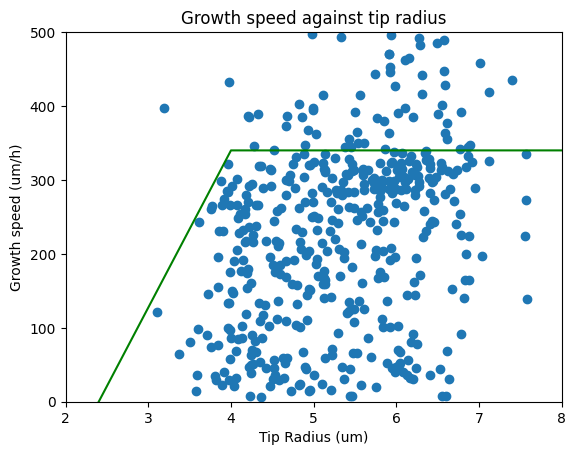

In [9]:
plt.scatter(radius, growth_l)

r0 = 2.4
rmax= 4

r = np.linspace(2, 8, 100)
y = 340*np.minimum(1, (r-r0)/(rmax-r0))
plt.plot(r, y, color='green')

plt.title('Growth speed against tip radius')
plt.xlabel('Tip Radius (um)')
plt.ylabel('Growth speed (um/h)')
plt.xlim(2, 8)
plt.ylim(0, 500)
np.corrcoef(radius, growth_l)[0, 1]